Student: Adnan Sheik

# Scenario
We will make a shortest-path planning using Q-Learning on a cliff walking maze. <br>
Referring to the picture below:
1. the environment consists of 30 tiles (5 rows and 6 columns).
2. The end Goal is marked with "Goal".
3. the cliff is marked with a grey box
4. the safe route is marked with a white box

In [ ]:
# 01 import necessary libraries
import numpy as np

# Define the environment
The environment consists of states, actions, and rewards. <br>
The inputs to the agent are states and actions. <br>
The output for the agent is possible actions

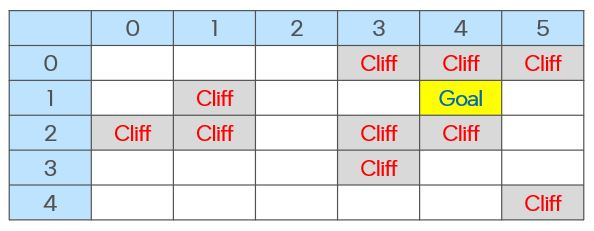

In [ ]:
# 02 define the shape of the environment (i.e., its states)
environment_rows = 5
environment_columns = 6

# let's create the Q-values table.
# it will hold the current Q-values for each state-action pair, Q(s,a)
# There are 30 states (5 rows, 6 columns)
# There are 4 actions ("up", "down", "left", "right")
# let's initialize it with zeros first
q_values = np.zeros((environment_rows, environment_columns, 4))


In [ ]:
# 03 view how does your Q-value look like in the beginning
q_values

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]])

In [ ]:
# 04 define actions
# we will use numeric (index) to represent the actions
# 0 = up, 1 = right, 2 = down, 3 = left
actions = ['up', 'right', 'down', 'left']

In [ ]:
# 05 let's create the rewards.
# the Goal will have +100
# the cliff will have -100
# each step taken will have -1

# let's start by initializing all to be -1
rewards = np.full((environment_rows, environment_columns), -1.)

# let's change the rewards for goal to be +100
rewards[1, 4] = 100. #set the reward for the packaging area (i.e., the goal) to 100

In [ ]:
# 06 view how does your reward look like in the beginning
rewards

array([[ -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
       [ -1.,  -1.,  -1.,  -1., 100.,  -1.],
       [ -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
       [ -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
       [ -1.,  -1.,  -1.,  -1.,  -1.,  -1.]])

In [ ]:
# 07 now let's fill in the cliff

# row 0
rewards[0, 3] = -100.
rewards[0, 4] = -100.
rewards[0, 5] = -100.

# row 1
rewards[1, 1] = -100.

# row 2
rewards[2, 0] = -100.
rewards[2, 1] = -100.
rewards[2, 3] = -100.
rewards[2, 4] = -100.

# row 3
rewards[3, 3] = -100.

# row 4
rewards[4, 5] = -100.

In [ ]:
# 08 view how does your reward look like now
rewards

array([[  -1.,   -1.,   -1., -100., -100., -100.],
       [  -1., -100.,   -1.,   -1.,  100.,   -1.],
       [-100., -100.,   -1., -100., -100.,   -1.],
       [  -1.,   -1.,   -1., -100.,   -1.,   -1.],
       [  -1.,   -1.,   -1.,   -1.,   -1., -100.]])

# Train model
This section consists of 2 parts: <br>
1. helper function
2. training the AI model <br>

There are 5 helper functions, as described in the next cell

In [ ]:
# 09 Helper function 1
# define a function that determines if the specified location is a terminal state
# terminal state refers to Goal or Cliff
# because we will end the episode if we reach Goal or Cliff
def is_terminal_state(current_row_index, current_column_index):
    if rewards[current_row_index, current_column_index] == -1.: # it is not terminal if the rewards is -1
        return False
    else:
        return True


# Helper function 2
# define a function that will choose a random starting location
# this starting location must not be Goal or Cliff
def get_starting_location():
    current_row_index = np.random.randint(environment_rows)       # get a random row index
    current_column_index = np.random.randint(environment_columns) # get a random column index

    while is_terminal_state(current_row_index, current_column_index):  # True if it is terminal
        current_row_index = np.random.randint(environment_rows)        # repeat to get another random row index
        current_column_index = np.random.randint(environment_columns)  # repeat to get another random row index
    return current_row_index, current_column_index     # returns a random starting location that is not terminal


# Helper function 3
# define an epsilon greedy algorithm for deciding the next action
def get_next_action(current_row_index, current_column_index, epsilon):
    if np.random.random() < epsilon: # choose the action with the highest q_values
        return np.argmax(q_values[current_row_index, current_column_index])

    else:                            # choose a random action
        return np.random.randint(4)


# Helper function 4
# define a function that will get the next location based on the chosen action
# refer to how the board is drawn physically, with the rows and columns
def get_next_location(current_row_index, current_column_index, action_index):
    new_row_index = current_row_index
    new_column_index = current_column_index
    if actions[action_index] == 'up' and current_row_index > 0:
        new_row_index -= 1
    elif actions[action_index] == 'right' and current_column_index < environment_columns - 1:
        new_column_index += 1
    elif actions[action_index] == 'down' and current_row_index < environment_rows - 1:
        new_row_index += 1
    elif actions[action_index] == 'left' and current_column_index > 0:
        new_column_index -= 1
    return new_row_index, new_column_index


# Helper function 5
# Define a function that will get the shortest path that is on the white tiles
def get_shortest_path(start_row_index, start_column_index):
    if is_terminal_state(start_row_index, start_column_index): # check if it is on Goal or Cliff
        return []                                              # if yes, there are no available steps

    else: #if this is a 'legal' starting location
        current_row_index, current_column_index = start_row_index, start_column_index
        shortest_path = []
        shortest_path.append([current_row_index, current_column_index])    # add the current coordinate to the list

    while not is_terminal_state(current_row_index, current_column_index):  # repeat until we reach Goal or Cliff
        action_index = get_next_action(current_row_index, current_column_index, 1.)
        # get next coordinate

        current_row_index, current_column_index = get_next_location(current_row_index, current_column_index, action_index)
        # update that next coordinate as current coordinate

        shortest_path.append([current_row_index, current_column_index])
#        # add the current coordinate to the list
    return shortest_path

In [ ]:
# 10 Training the AI model
# define training parameters
epsilon = 0.9 #the percentage of time when we should take the best action (instead of a random action)
discount_factor = 0.9 #discount factor for future rewards
learning_rate = 0.9 #the rate at which the AI agent should learn

for episode in range(1000): # run through 1000 training episodes
    row_index, column_index = get_starting_location()
#
    while not is_terminal_state(row_index, column_index):
#        # choose which action to take (i.e., where to move next)
        action_index = get_next_action(row_index, column_index, epsilon)
#
#        # perform the chosen action, and transition to the next state / next location
        old_row_index, old_column_index = row_index, column_index # store the old row and column indexes
        row_index, column_index = get_next_location(row_index, column_index, action_index)
#
        # receive the reward for moving to the new state, and calculate the temporal difference
        reward = rewards[row_index, column_index]
        old_q_value = q_values[old_row_index, old_column_index, action_index]
        temporal_difference = reward + (discount_factor * np.max(q_values[row_index, column_index])) - old_q_value
#
#        # update the Q-value for the previous state and action pair
        new_q_value = old_q_value + (learning_rate * temporal_difference)
        q_values[old_row_index, old_column_index, action_index] = new_q_value

print('Training complete!')

Training complete!


In [ ]:
# 11 Get shortest path

#display a few shortest paths
print(get_shortest_path(4,0)) #starting at row 4, column 0
print(get_shortest_path(0,2)) #starting at row 0, column 2
print(get_shortest_path(4,4)) #starting at row 4, column 4

[[4, 0], [4, 1], [3, 1], [3, 2], [2, 2], [1, 2], [1, 3], [1, 4]]
[[0, 2], [1, 2], [1, 3], [1, 4]]
[[4, 4], [3, 4], [3, 5], [2, 5], [1, 5], [1, 4]]


In [ ]:
# 12 view how does your Q-value look like now
q_values

array([[[  54.94802864,   62.171     ,   48.40531645,   54.36676421],
        [  62.16446865,   70.19      ,  -99.9       ,   54.95389931],
        [  70.18992735,  -99.9999    ,   79.1       ,   62.17099999],
        [   0.        ,    0.        ,    0.        ,    0.        ],
        [   0.        ,    0.        ,    0.        ,    0.        ],
        [   0.        ,    0.        ,    0.        ,    0.        ]],

       [[  54.9539    ,  -99.9       ,  -99.        ,   43.18005213],
        [   0.        ,    0.        ,    0.        ,    0.        ],
        [  70.19      ,   89.        ,   70.19      , -100.        ],
        [-100.        ,  100.        , -100.        ,   79.1       ],
        [   0.        ,    0.        ,    0.        ,    0.        ],
        [ -99.99999   ,   88.9999101 ,   79.09992   ,  100.        ]],

       [[   0.        ,    0.        ,    0.        ,    0.        ],
        [   0.        ,    0.        ,    0.        ,    0.        ],
        [  79.1 

# Exercise 1
Try to change the following parameters: <br>
epsilon <br>
discount_factor <br>
learning_rate <br>
What is your observation?

In [ ]:
# 13 Your Answer Here

epsilon = 0.3 #the percentage of time when we should take the best action (instead of a random action)
discount_factor = 0.3 #discount factor for future rewards
learning_rate = 0.3 #the rate at which the AI agent should learn

for episode in range(1000): # run through 1000 training episodes
    row_index, column_index = get_starting_location()
#
    while not is_terminal_state(row_index, column_index):
#        # choose which action to take (i.e., where to move next)
        action_index = get_next_action(row_index, column_index, epsilon)
#
#        # perform the chosen action, and transition to the next state / next location
        old_row_index, old_column_index = row_index, column_index # store the old row and column indexes
        row_index, column_index = get_next_location(row_index, column_index, action_index)
#
        # receive the reward for moving to the new state, and calculate the temporal difference
        reward = rewards[row_index, column_index]
        old_q_value = q_values[old_row_index, old_column_index, action_index]
        temporal_difference = reward + (discount_factor * np.max(q_values[row_index, column_index])) - old_q_value
#
#        # update the Q-value for the previous state and action pair
        new_q_value = old_q_value + (learning_rate * temporal_difference)
        q_values[old_row_index, old_column_index, action_index] = new_q_value

print('Training complete!')
print(get_shortest_path(4,0)) #starting at row 4, column 0
q_values

#I can observe that the agent is exploring new actions. The reward system has been altered as well, this changes the q values of each cell in term impacting the setimated future rewards for each action.

Training complete!
[[4, 0], [3, 0], [3, 1], [3, 2], [2, 2], [1, 2], [1, 3], [1, 4]]


array([[[  -1.18207006,   -0.607     ,   -1.35384535,   -1.18153457],
        [  -0.60699659,    1.31      , -100.        ,   -1.18204922],
        [   1.31001103, -100.        ,    7.7       ,   -0.6069999 ],
        [   0.        ,    0.        ,    0.        ,    0.        ],
        [   0.        ,    0.        ,    0.        ,    0.        ],
        [   0.        ,    0.        ,    0.        ,    0.        ]],

       [[  -1.18200081, -100.        , -100.        ,   -1.32151692],
        [   0.        ,    0.        ,    0.        ,    0.        ],
        [   1.31000013,   29.        ,    1.31000008, -100.        ],
        [-100.        ,  100.        , -100.        ,    7.70000803],
        [   0.        ,    0.        ,    0.        ,    0.        ],
        [-100.        ,   29.00275989,    7.700815  ,  100.        ]],

       [[   0.        ,    0.        ,    0.        ,    0.        ],
        [   0.        ,    0.        ,    0.        ,    0.        ],
        [   7.7 

# Exercise 2
Try to change the episodes to the following values: <br>
50 <br>
500 <br>
2000 <br>
How accurate is your answer?

In [ ]:
# 14 Your Answer Here - After running through 50 series, it decided to take an action towards [4, 1] instead of the usual [3, 0] as observered when training through 500+ episodes. All answers still remain accurate and do not hit cliffs.

for episode in range(50): # run through 50 training episodes
    row_index, column_index = get_starting_location()
#
    while not is_terminal_state(row_index, column_index):
#        # choose which action to take (i.e., where to move next)
        action_index = get_next_action(row_index, column_index, epsilon)
#
#        # perform the chosen action, and transition to the next state / next location
        old_row_index, old_column_index = row_index, column_index # store the old row and column indexes
        row_index, column_index = get_next_location(row_index, column_index, action_index)
#
        # receive the reward for moving to the new state, and calculate the temporal difference
        reward = rewards[row_index, column_index]
        old_q_value = q_values[old_row_index, old_column_index, action_index]
        temporal_difference = reward + (discount_factor * np.max(q_values[row_index, column_index])) - old_q_value
#
#        # update the Q-value for the previous state and action pair
        new_q_value = old_q_value + (learning_rate * temporal_difference)
        q_values[old_row_index, old_column_index, action_index] = new_q_value



print('Training complete for 50 episodes!')
print(get_shortest_path(4,0)) #starting at row 4, column 0

Training complete for 50 episodes!
[[4, 0], [4, 1], [3, 1], [3, 2], [2, 2], [1, 2], [1, 3], [1, 4]]


In [ ]:
for episode in range(500): # run through 500 training episodes
    row_index, column_index = get_starting_location()
#
    while not is_terminal_state(row_index, column_index):
#        # choose which action to take (i.e., where to move next)
        action_index = get_next_action(row_index, column_index, epsilon)
#
#        # perform the chosen action, and transition to the next state / next location
        old_row_index, old_column_index = row_index, column_index # store the old row and column indexes
        row_index, column_index = get_next_location(row_index, column_index, action_index)
#
        # receive the reward for moving to the new state, and calculate the temporal difference
        reward = rewards[row_index, column_index]
        old_q_value = q_values[old_row_index, old_column_index, action_index]
        temporal_difference = reward + (discount_factor * np.max(q_values[row_index, column_index])) - old_q_value
#
#        # update the Q-value for the previous state and action pair
        new_q_value = old_q_value + (learning_rate * temporal_difference)
        q_values[old_row_index, old_column_index, action_index] = new_q_value

print('Training complete for 500 episodes!')
print(get_shortest_path(4,0)) #starting at row 4, column 0

Training complete for 500 episodes!
[[4, 0], [3, 0], [3, 1], [3, 2], [2, 2], [1, 2], [1, 3], [1, 4]]


In [ ]:
for episode in range(2000): # run through 2000 training episodes
    row_index, column_index = get_starting_location()
#
    while not is_terminal_state(row_index, column_index):
#        # choose which action to take (i.e., where to move next)
        action_index = get_next_action(row_index, column_index, epsilon)
#
#        # perform the chosen action, and transition to the next state / next location
        old_row_index, old_column_index = row_index, column_index # store the old row and column indexes
        row_index, column_index = get_next_location(row_index, column_index, action_index)
#
        # receive the reward for moving to the new state, and calculate the temporal difference
        reward = rewards[row_index, column_index]
        old_q_value = q_values[old_row_index, old_column_index, action_index]
        temporal_difference = reward + (discount_factor * np.max(q_values[row_index, column_index])) - old_q_value
#
#        # update the Q-value for the previous state and action pair
        new_q_value = old_q_value + (learning_rate * temporal_difference)
        q_values[old_row_index, old_column_index, action_index] = new_q_value


print(get_shortest_path(4,0)) #starting at row 4, column 0
print('Training complete for 200 episodes!')


[[4, 0], [3, 0], [3, 1], [3, 2], [2, 2], [1, 2], [1, 3], [1, 4]]
Training complete for 200 episodes!


# Exercise 3
Try to change your starting point to the following coordinates: <br>
(1,0) <br>
(3,1) <br>
(4,3) <br>
What are your answers?

In [ ]:
# 15 Your Answer Here (1,0) = [[1, 0], [0, 0], [0, 1], [0, 2], [1, 2], [1, 3], [1, 4]] | (3,1) = [[3, 1], [3, 2], [2, 2], [1, 2], [1, 3], [1, 4]] | (4,3) = [4, 3], [4, 4], [3, 4], [3, 5], [2, 5], [1, 5], [1, 4]].

print(get_shortest_path(1,0))
print(get_shortest_path(3,1))
print(get_shortest_path(4,3))

[[1, 0], [0, 0], [0, 1], [0, 2], [1, 2], [1, 3], [1, 4]]
[[3, 1], [3, 2], [2, 2], [1, 2], [1, 3], [1, 4]]
[[4, 3], [4, 4], [3, 4], [3, 5], [2, 5], [1, 5], [1, 4]]
